### Step 1: Classify Variables  
We’ll review each feature to determine if it’s:
- **Nominal Categorical**: Names or labels with no order  
- **Binary Categorical**: Two possible categories (e.g., 0/1, Yes/No)  
- **Discrete**: Count data in whole numbers  
- **Continuous**: Numerical data with potential decimal values  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

df = pd.read_csv("Files\heart_dataset.csv")

# Convert famhist from 'Present'/'Absent' → 1/0
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        384 non-null    float64
 1   tobacco    372 non-null    float64
 2   ldl        373 non-null    float64
 3   adiposity  372 non-null    float64
 4   famhist    367 non-null    float64
 5   typea      371 non-null    float64
 6   obesity    372 non-null    float64
 7   alcohol    372 non-null    float64
 8   age        377 non-null    float64
 9   chd        373 non-null    float64
dtypes: float64(10)
memory usage: 32.3 KB


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134.0,13.60,3.50,27.78,1.0,60.0,25.99,57.34,49.0,1.0
1,132.0,6.20,6.47,36.21,1.0,62.0,30.77,14.14,45.0,0.0
2,142.0,4.05,3.38,16.20,0.0,NaN,20.81,2.62,38.0,0.0
3,114.0,4.08,4.59,14.60,1.0,62.0,23.11,6.72,58.0,NaN
4,114.0,NaN,3.83,19.40,1.0,49.0,24.86,2.49,NaN,NaN


### Import required Python libraries
We import pandas, NumPy, matplotlib, seaborn, and scipy for data analysis, visualization, and statistical computations.

### Load and preview the Heart dataset
Display the first few rows to confirm column names and data structure.

Text(0.5, 1.0, 'Missing Values Heatmap')

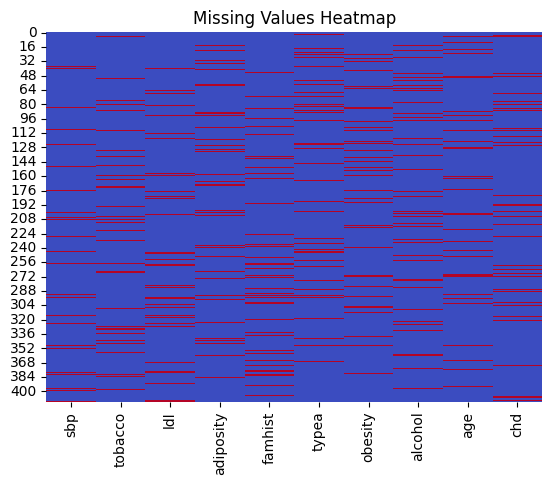

In [5]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")

### Visualize missing values
A heatmap highlights missing data. Columns with many missing entries may need cleaning or imputation.

In [20]:
df.describe()                     

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,384.000000,372.000000,373.000000,372.000000,367.000000,371.000000,372.000000,372.000000,377.000000,373.000000
mean,139.216146,3.676425,4.569303,25.210753,0.449591,52.008086,25.763602,18.425134,42.453581,0.335121
std,20.307368,4.568564,1.888691,7.760257,0.498132,9.822888,3.854265,25.971090,15.312649,0.472667
min,101.000000,0.000000,0.980000,7.120000,0.000000,20.000000,17.890000,0.000000,15.000000,0.000000
25%,124.000000,0.057500,3.240000,19.307500,0.000000,46.000000,22.835000,0.195000,30.000000,0.000000
50%,136.000000,1.800000,4.220000,26.115000,0.000000,52.000000,25.675000,7.300000,45.000000,0.000000
75%,148.500000,5.640000,5.470000,30.790000,1.000000,58.000000,28.167500,25.820000,57.000000,1.000000
max,218.000000,27.400000,14.160000,42.490000,1.000000,73.000000,40.340000,145.290000,64.000000,1.000000


### General descriptive statistics
Shows count, mean, standard deviation, min, max, and quartiles for each numeric variable.


In [19]:
df.loc[df['ldl'].idxmax()]        # (2)
df.loc[df['sbp'].idxmin()]        # (3)
df['tobacco'].agg(['mean','std']) # (4)

mean    3.676425
std     4.568564
Name: tobacco, dtype: float64

#### Lowest systolic blood pressure (sbp)
Find patient(s) with the lowest SBP for comparison across population.

#### Lowest systolic blood pressure (sbp)
Find patient(s) with the lowest SBP for comparison across population.

#### Mean and standard deviation of tobacco use
Compute central tendency and dispersion for tobacco consumption.

Text(0.5, 1.0, 'Alcohol Consumption — CHD = 1')

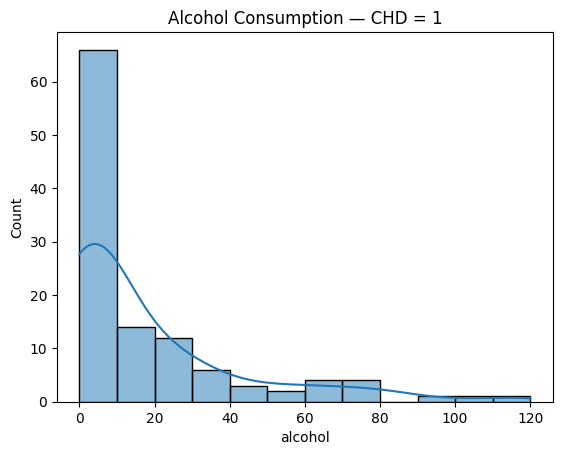

In [7]:
sns.histplot(df[df['chd']==1]['alcohol'], kde=True)
plt.title("Alcohol Consumption — CHD = 1")

### Alcohol consumption by CHD status
Visualize how alcohol usage differs between individuals with and without CHD. Note any noticeable shifts or overlaps.

C:\Users\balto\AppData\Local\Temp\ipykernel_2148\217659786.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = df.groupby('age_group')['chd'].mean()


<Axes: xlabel='age_group'>

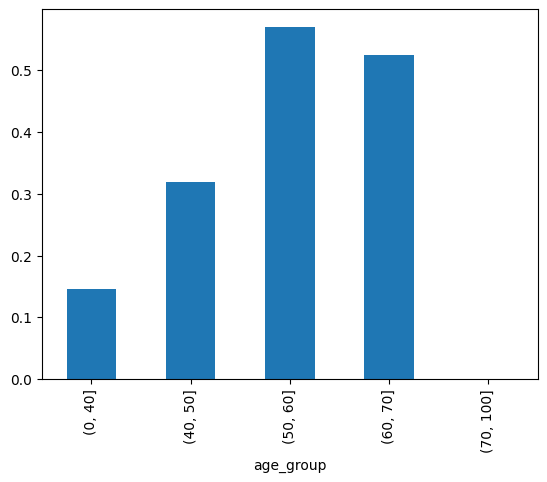

In [8]:
df['age_group'] = pd.cut(df['age'], bins=[0,40,50,60,70,100])
survival = df.groupby('age_group')['chd'].mean()
survival.plot(kind='bar')

### Survival rate by age group
Compare CHD incidence across age brackets to identify which age group has the highest survival (lowest CHD rate).

Text(0.5, 1.0, 'Type-A Score vs CHD')

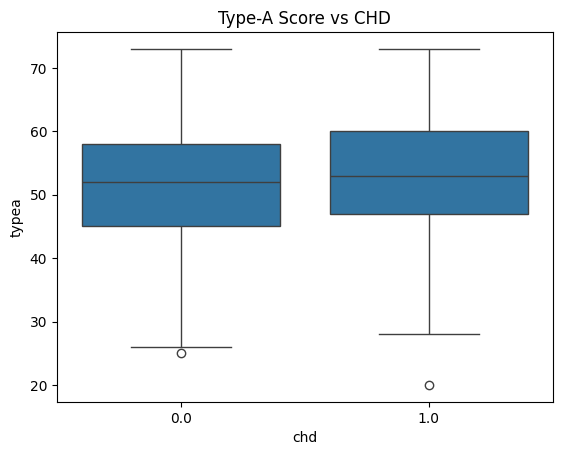

In [9]:
sns.boxplot(x='chd', y='typea', data=df)
plt.title("Type-A Score vs CHD")

### Relationship between Type-A behavior and CHD
Plot and discuss whether higher Type-A scores correlate with greater CHD occurrence.

<Axes: xlabel='chd', ylabel='sbp'>

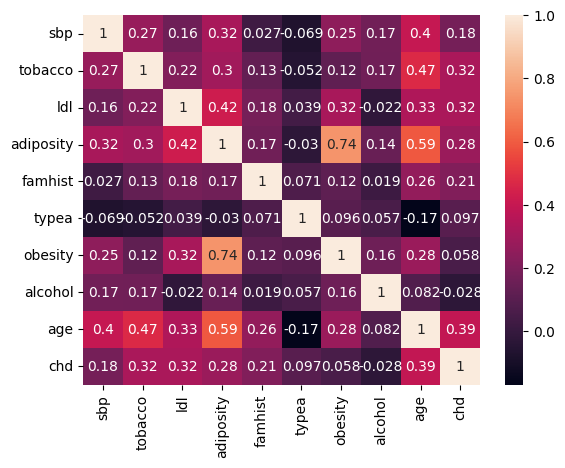

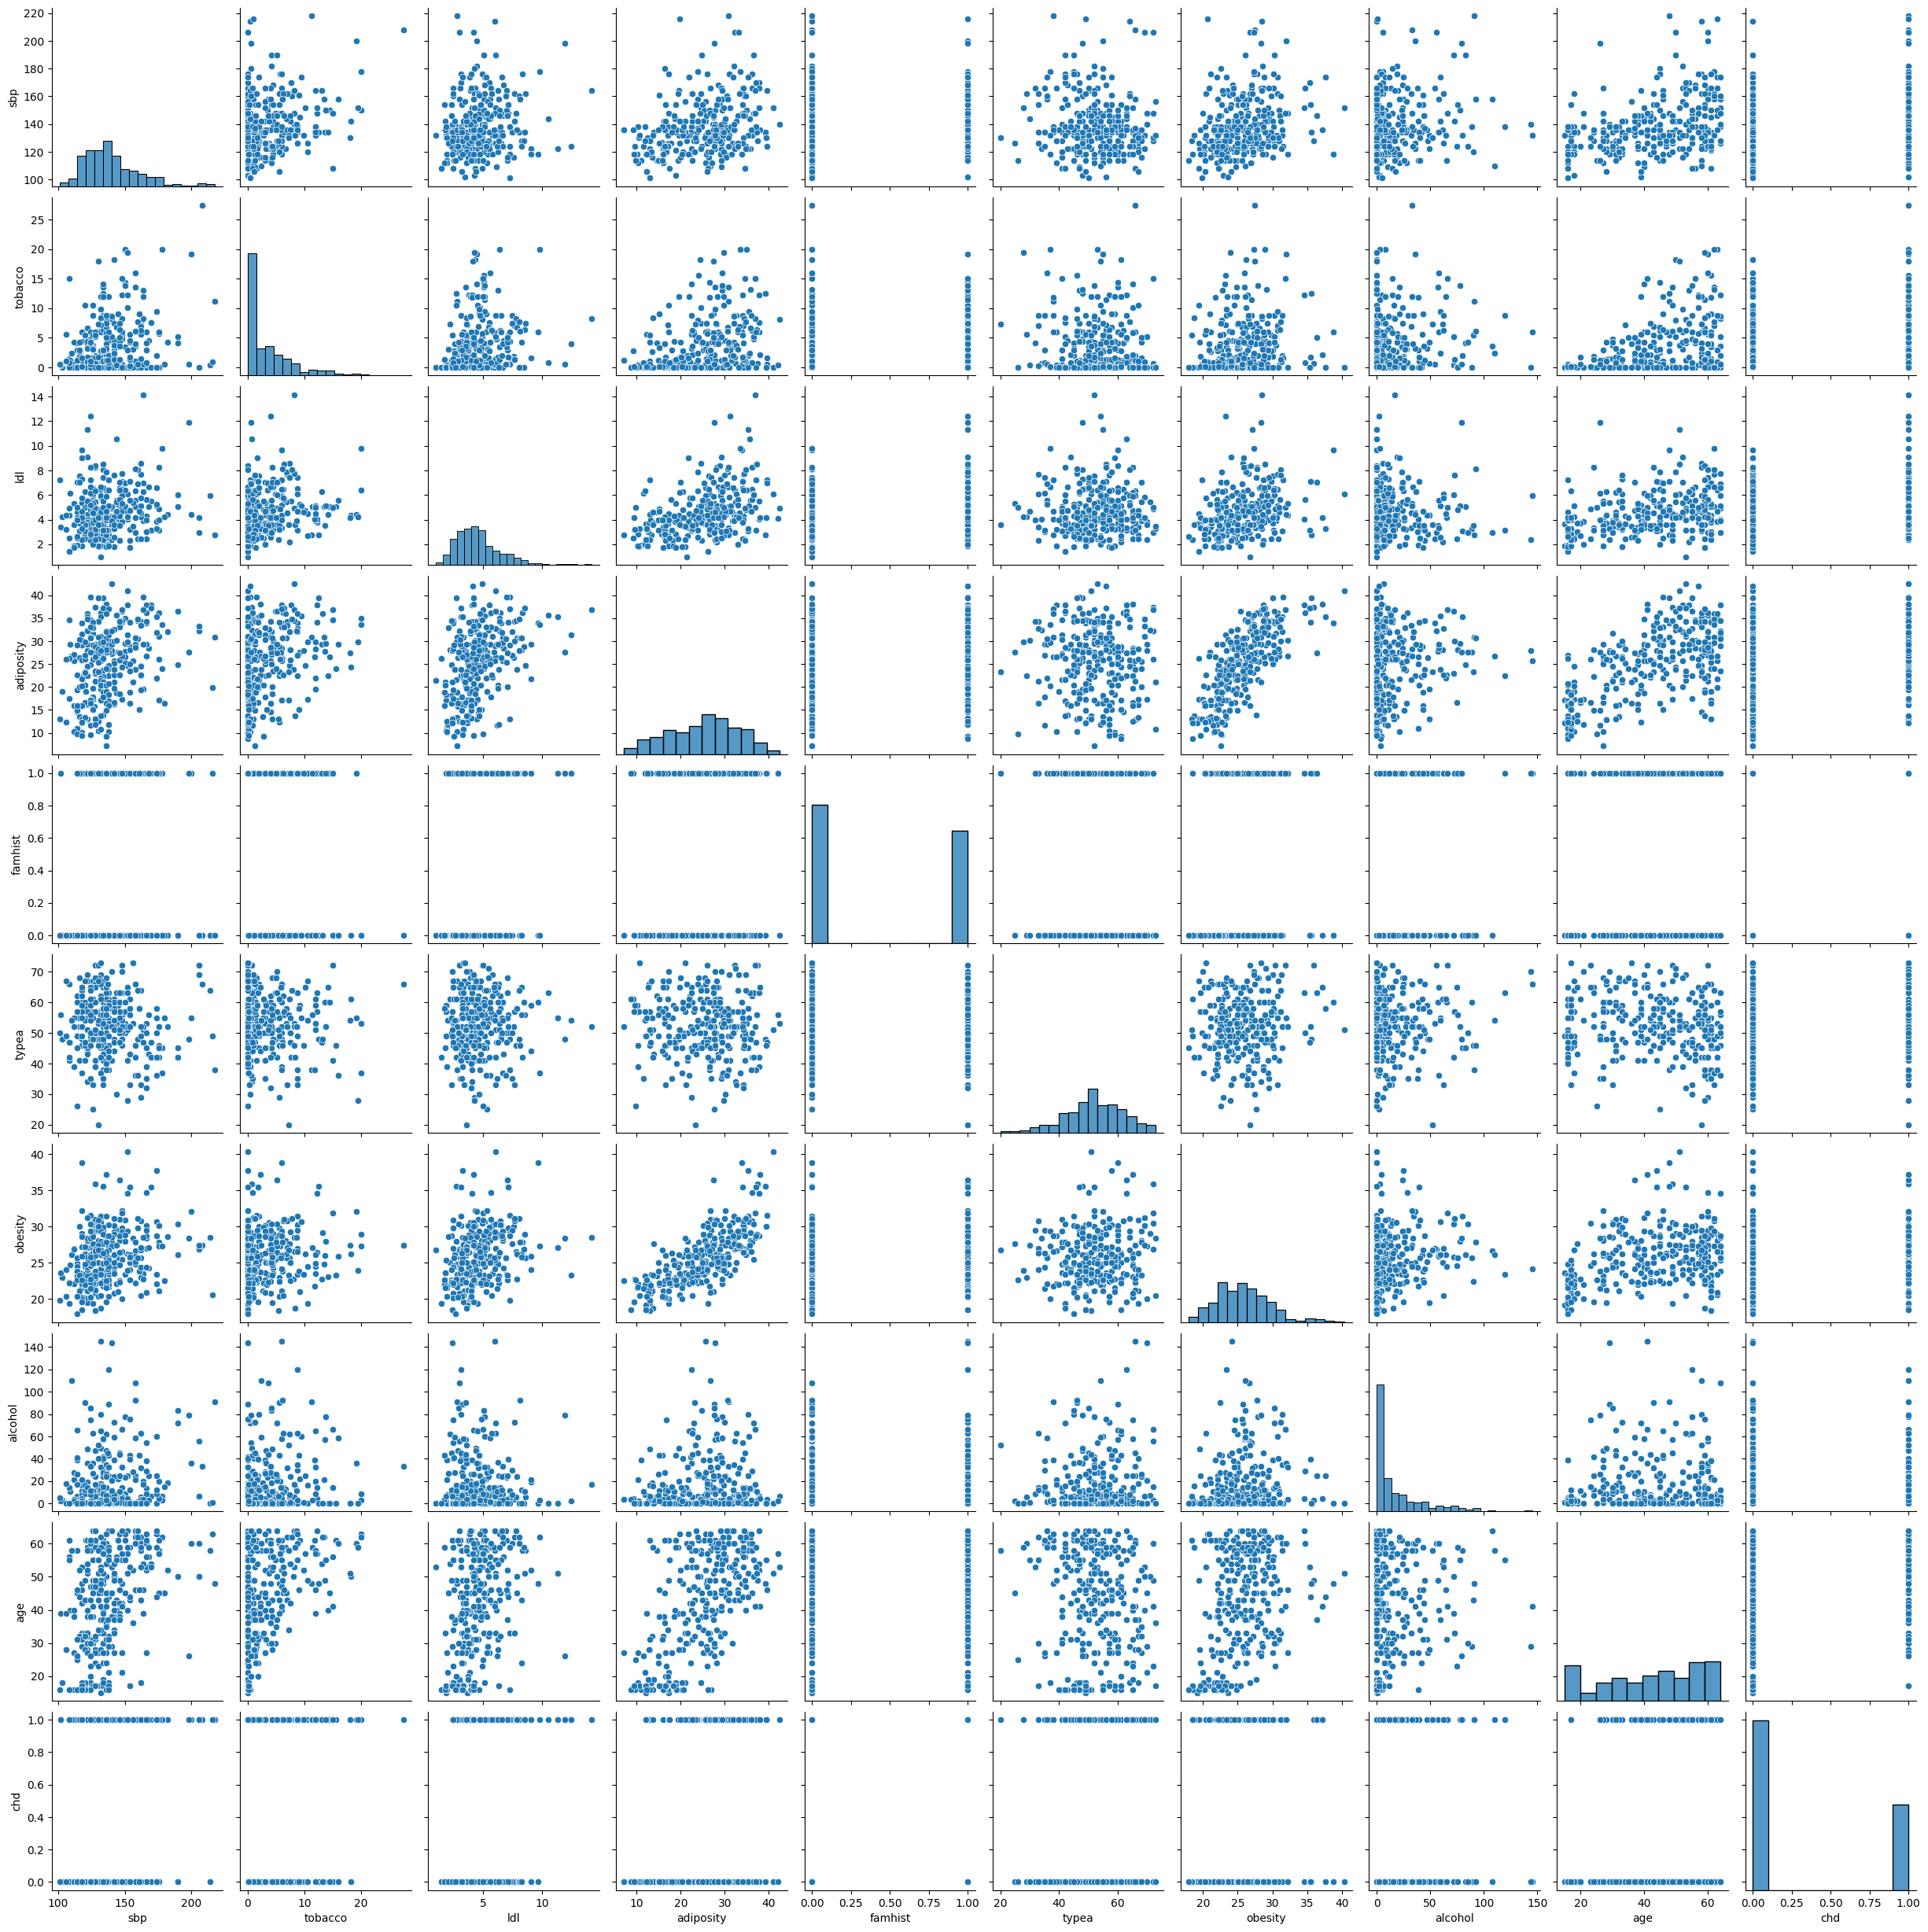

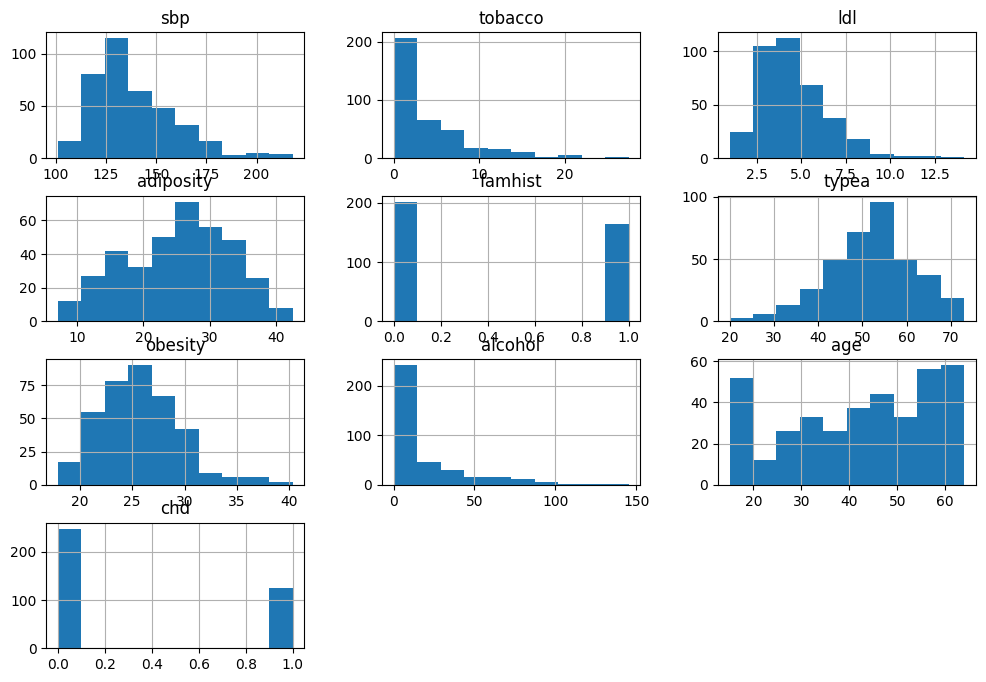

In [10]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True)
sns.pairplot(df)
df.hist(figsize=(12,8))
sns.boxplot(x='chd', y='sbp', data=df)

#### Correlation matrix heatmap
Shows strength of linear relationships between variables.

#### Scatter matrix (pair plot)
Illustrates pairwise relationships between all numeric features.

#### Histograms per column
Displays individual feature distributions.

#### Boxplots split by CHD
Visualize distribution differences between CHD = 0 and 1 groups.

In [11]:
sample = df.sample(100, random_state=42)
p = (sample['chd']==1).mean()
# Probability of >40% = P(X>40) with Binomial(n=100,p0)
from scipy.stats import binom
binom.sf(40,100,df['chd'].mean())

0.07095922989498611

### Probability tasks
(a) Simulate 100 random patients and find probability > 40% CHD.  
(b) Estimate probability of patients older than 60 with family history of heart disease.


In [12]:
prob = len(df[(df['age']>60)&(df['famhist']==1)]) / len(df)

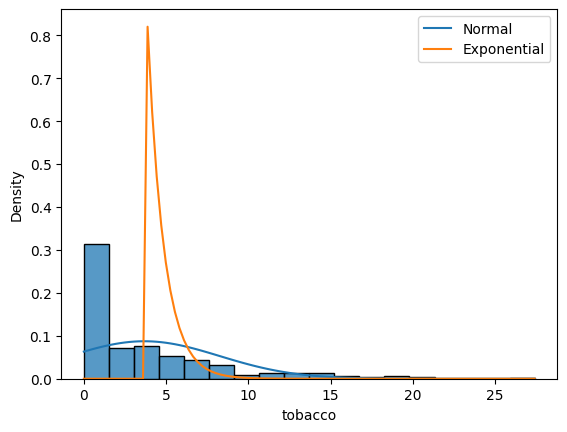

In [13]:
from scipy.stats import norm, expon
sns.histplot(df['tobacco'], kde=False, stat="density")
x = np.linspace(df['tobacco'].min(), df['tobacco'].max(), 100)
plt.plot(x, norm.pdf(x, df['tobacco'].mean(), df['tobacco'].std()), label="Normal")
plt.plot(x, expon.pdf(x, df['tobacco'].mean()), label="Exponential")
plt.legend()

### Fit normal vs exponential distribution to tobacco use
Compare fitted curves visually and report which distribution aligns better.

In [14]:
from sklearn.datasets import load_iris
from scipy.stats import norm, binom, ttest_ind
import numpy as np

iris = load_iris(as_frame=True).frame

### Load Iris dataset
Use `sklearn.datasets.load_iris()` to load features and species labels.

In [15]:
setosa = iris[iris['target']==0]['petal length (cm)']
mean, std = setosa.mean(), setosa.std()

def plot_std_normal_with_probability(mean, std, lower, upper):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y)
    plt.fill_between(x, y, where=(x>=lower)&(x<=upper), alpha=0.4)
    plt.title("Normal PDF with Shaded Probability")
    plt.show()

prob = norm.cdf(1.8,mean,std)-norm.cdf(1.2,mean,std)


### Function to plot normal distribution with shaded probability
Define `plot_std_normal_with_probability(mean, std, lower, upper)` to visualize probabilities for given ranges.

<Axes: ylabel='Probability'>

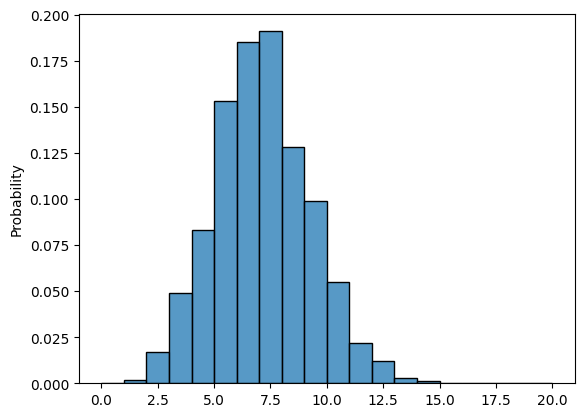

In [16]:
p = (iris['target']==0).mean()
prob_8 = binom.pmf(8, 20, p)
prob_10plus = binom.sf(9, 20, p)

sims = [np.sum(np.random.binomial(1,p,20)) for _ in range(1000)]
sns.histplot(sims, stat="probability", bins=range(0,21))


### Binomial distribution for Setosa samples
(a) Probability of exactly 8 Setosa in 20 flowers.  
(b) Probability of at least 10 Setosa.  
(c) Simulate 1,000 samples and compare simulated histogram to theoretical PMF.

<Axes: xlabel='target', ylabel='sepal length (cm)'>

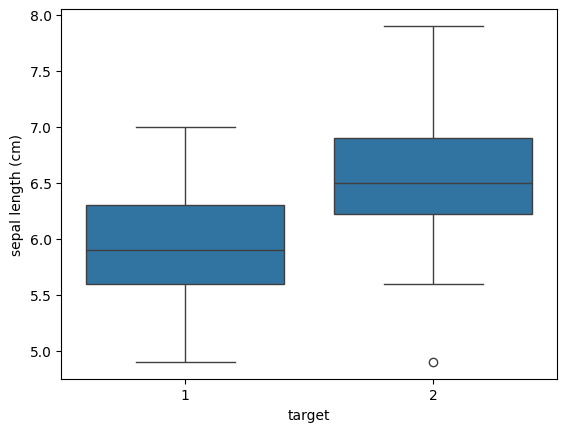

In [21]:
versicolor = iris[iris['target']==1]['sepal length (cm)']
virginica = iris[iris['target']==2]['sepal length (cm)']
t_stat, p_val = ttest_ind(versicolor, virginica, equal_var=False)

sns.boxplot(data=iris[iris['target']!=0], x='target', y='sepal length (cm)')

### Two-sample t-test: Versicolor vs Virginica sepal length
State H₀ and H₁, run t-test, interpret p-value, and visualize with boxplots.

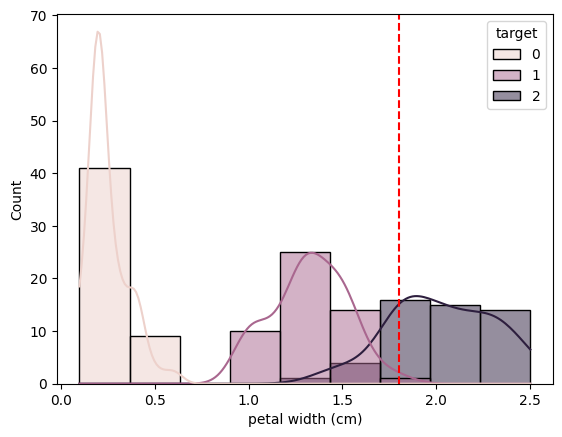

In [18]:
def bayes(prior, likelihood, evidence):
    return (prior * likelihood) / evidence

p_virginica = (iris['target']==2).mean()
p_width_given_virginica = np.mean((iris['target']==2) & (iris['petal width (cm)']>1.8)) / np.mean(iris['target']==2)
p_width = np.mean(iris['petal width (cm)']>1.8)

posterior = bayes(p_virginica, p_width_given_virginica, p_width)

sns.histplot(data=iris, x='petal width (cm)', hue='target', kde=True)
plt.axvline(1.8, color='red', linestyle='--')


### Bayes’ theorem classification based on petal width
Compute the posterior probability that a flower is Virginica given petal width > 1.8 cm.  
Include prior, likelihoods, and visualize petal width distributions for all species with a line at 1.8 cm.

## Summary
Summarize major findings:
- Key relationships in the Heart dataset (e.g., age, LDL, alcohol vs CHD).  
- Probabilistic insights from the Iris dataset (normal, binomial, t-test, Bayes).  
Reflect on how descriptive and inferential statistics complement each other.